# Overview
The project involves contributors evaluating tweets related to various brands and products. The crowd is tasked with determining whether each tweet expresses positive, negative, or neutral emotions towards a brand and/or product mentioned. Additionally, if there is emotional content, contributors are asked to identify which specific brand or product is being targeted.

# Business Understanding
Understanding public sentiment towards brands and products is crucial for businesses to gauge their reputation, assess customer satisfaction, and identify areas for improvement. Analyzing social media data like tweets provides valuable insights into consumer opinions and preferences.

# Data Understanding
The dataset contains 9093 rows of tweets related to multiple brands and products. Each tweet is annotated by contributors to indicate the sentiment expressed (positive, negative, or neutral) and specify the brand or product targeted by the emotion.

# Main Objective
The main objective of the project is to analyze the sentiment of tweets towards various brands and products. By categorizing the sentiment as positive, negative, or neutral and identifying the specific targets of emotions, the aim is to gain insights into consumer perceptions and attitudes.

## Specific Objectives:

1.Classify each tweet as expressing positive, negative, or neutral sentiment towards brands and products.

2.Identify the specific brands or products targeted by the emotional content in each tweet.

3.Analyze the overall sentiment distribution across brands and products.

4.Explore patterns and trends in consumer sentiment over time or in response to specific events or marketing campaigns.


In [3]:
#import libraries
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# load the dataset
data = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')

data.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## EXPLORE THE DATASET

In [5]:
#checking the data shape

data.shape

(9093, 3)

In [6]:
# Get summary statistics
print(data.describe())

                                               tweet_text  \
count                                                9092   
unique                                               9065   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                             3291   
unique                               9   
top                               iPad   
freq                               946   

       is_there_an_emotion_directed_at_a_brand_or_product  
count                                                9093  
unique                                                  4  
top                    No emotion toward brand or product  
freq                                                 5389  


In [7]:
#checking columns
data.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [8]:
#checking missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


The column "tweet_text" has 1 missing value, and the column "emotion_in_tweet_is_directed_at" has 5802 missing values. The column "is_there_an_emotion_directed_at_a_brand_or_product" has 0 missing values.

In [9]:
# dealing with missing values
# replace NaN values in 'tweet_text' column 
data['tweet_text'].fillna('No text available', inplace=True)

# Replace NaN values in 'emotion_in_tweet_is_directed_at' column with a default emotion category
default_emotion = 'unknown'
data['emotion_in_tweet_is_directed_at'].fillna(default_emotion, inplace=True)


# PREPROCESSING

In [11]:
## Tokenization, lowercasing, and removing stopwords
stop_words = set(stopwords.words('english'))
data['tweet_text'] = data['tweet_text'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words]))


In [ ]:
# Print preprocessed data
print(data.head())

                                          tweet_text  \
0  iphone hrs tweeting dead need upgrade plugin s...   
1  jessedee know fludapp awesome app likely appre...   
2                swonderlin wait ipad also sale sxsw   
3  sxsw hope year festival crashy year iphone app...   
4  sxtxstate great stuff fri sxsw marissa mayer g...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion  


the 'tweet_text' column has been preprocessed by tokenization, lowercasing, and removing stopwords

# Data visualization

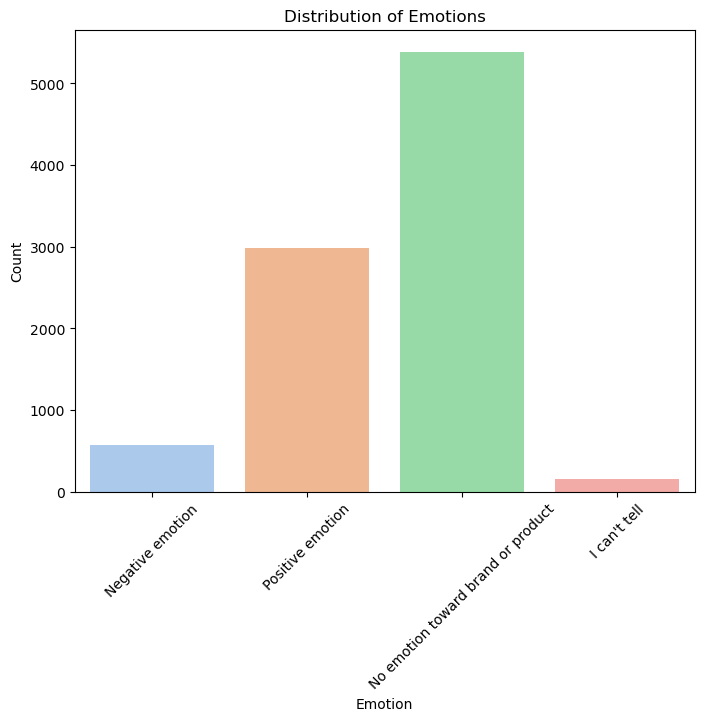

In [12]:
# Count plot of emotions
plt.figure(figsize=(8, 6))
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df, hue='is_there_an_emotion_directed_at_a_brand_or_product', palette='pastel', legend=False)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


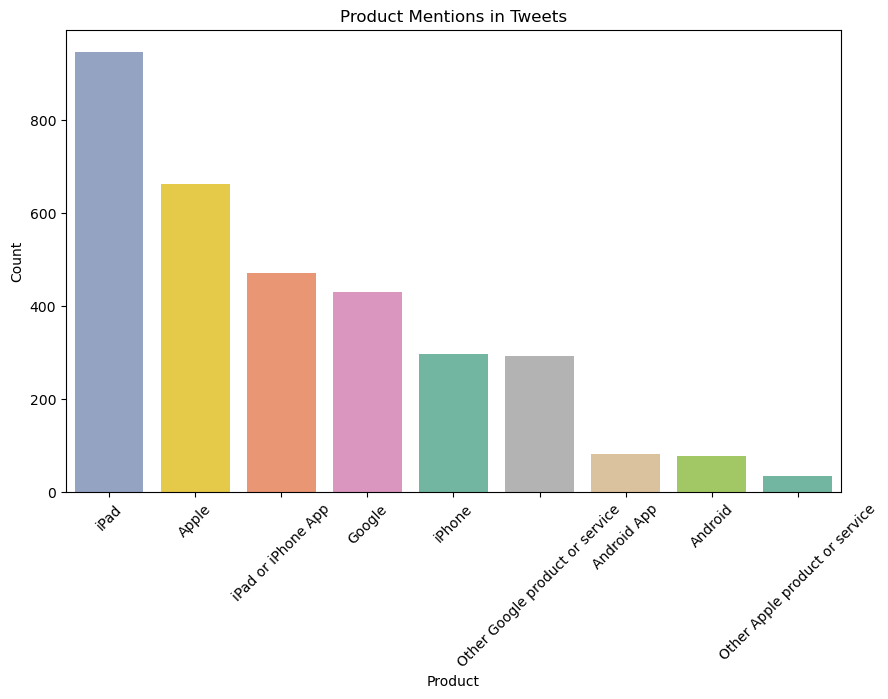

In [13]:
# Bar plot for product counts
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion_in_tweet_is_directed_at', data=df, order=df['emotion_in_tweet_is_directed_at'].value_counts().index, hue='emotion_in_tweet_is_directed_at', palette='Set2', legend=False)
plt.title("Product Mentions in Tweets")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



# Overall sentiment distribution

In [15]:
 #Calculate overall sentiment distribution
sentiment_distribution = data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
print("Overall Sentiment Distribution:")
print(sentiment_distribution)

Overall Sentiment Distribution:
is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64


This is the general overview of sentiment trends 

# Most mentioned brand or product

In [16]:
#Identify most mentioned brands/products
most_mentioned = data['emotion_in_tweet_is_directed_at'].value_counts().head(10)
print("\nTop 10 Mentioned Brands/Products:")
print(most_mentioned)


Top 10 Mentioned Brands/Products:
emotion_in_tweet_is_directed_at
unknown                            5802
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: count, dtype: int64


By examining the top 10 most mentioned brands or products, businesses can identify which ones are receiving the most attention or discussion on social media platforms.

# Sentiment distribution for each brand or product

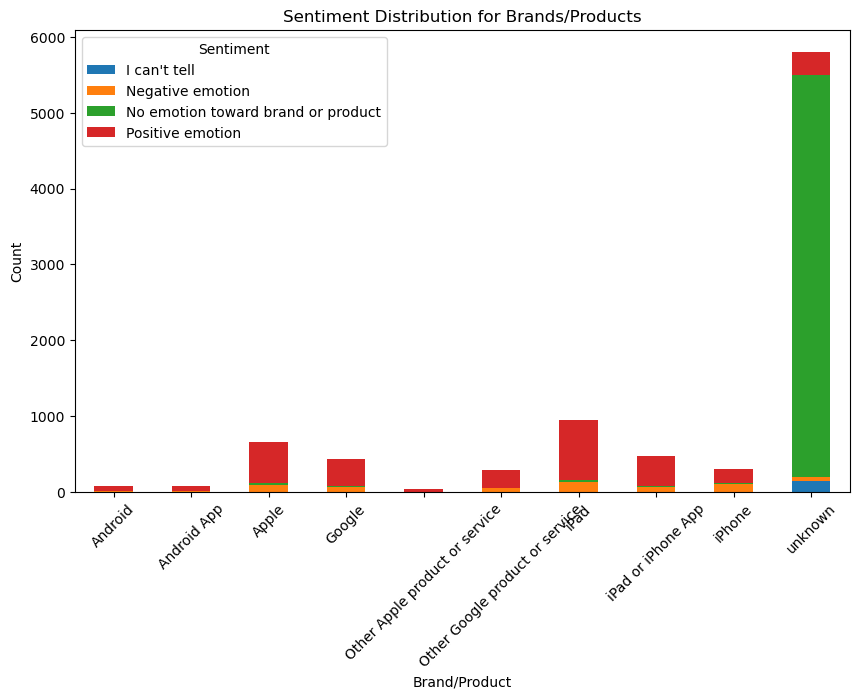

In [14]:
# Sentiment distribution for each brand/product
brand_sentiment = data.groupby(['emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']).size().unstack(fill_value=0)
brand_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Distribution for Brands/Products")
plt.xlabel("Brand/Product")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

The plot provides a visual representation of the sentiment distribution across different brands or products to allow us grasp sentiment trends across the brands or products.